In [2]:
import json
import networkx as nx
from networkx.algorithms import bipartite
import os

In [3]:
outpath = "./test2/results"

In [4]:
with open(os.path.join(outpath, "spaces.json")) as f:
    spaces = json.load(f)

In [53]:
G = nx.Graph()
space_vote_dist = {}
space_voters = {}
for space in spaces:
    G.add_node(space['id'], node_type="space", data=space)
    proposals = os.listdir(os.path.join(outpath, 'spaces', space['id']))
    for proposal in proposals:
        with open(os.path.join(outpath, 'spaces', space['id'], proposal)) as f:
            data = json.load(f)
            votes = data["votes_data"]
            del data['votes_data']
            G.add_node(data['id'], node_type="proposal", data=data)
            G.add_edge(data['id'], space['id'])
            for vote in votes:
                G.add_node(vote['voter'], node_type="user")
                G.add_edge(data['id'], vote['voter'], data=vote)
                if vote['space']['id'] not in space_vote_dist:
                    space_vote_dist[vote['space']['id']] = 0
                space_vote_dist[vote['space']['id']] += 1
                if vote['space']['id'] not in space_voters:
                    space_voters[vote['space']['id']] = {}
                if not vote['voter'] in space_voters[vote['space']['id']]:
                    space_voters[vote['space']['id']][vote['voter']] = True

In [44]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
sns.set()

In [68]:
data = []
data2 = []
for k in space_vote_dist:
    data.append((k, space_vote_dist[k]))
    data2.append((k, len(space_voters[k])))

In [77]:
tmp = sorted(data, key=lambda k: k[1], reverse=True)
X, Y = [], []
for el in tmp:
    X.append(el[0])
    Y.append(el[1])

Text(0.5, 1.0, '(Inequal) number of votes per space')

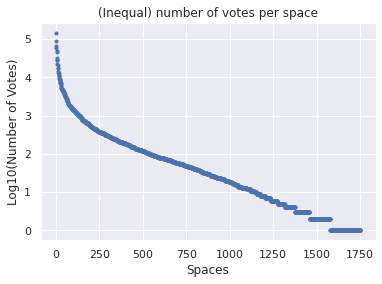

In [78]:
plt.plot(range(len(X)), np.log10(Y), '.')
plt.ylabel('Log10(Number of Votes)')
plt.xlabel('Spaces')
plt.title("(Inequal) number of votes per space")

In [79]:
tmp = sorted(data2, key=lambda k: k[1], reverse=True)
X, Y = [], []
for el in tmp:
    X.append(el[0])
    Y.append(el[1])

Text(0.5, 1.0, '(Inequal) number of voters per space')

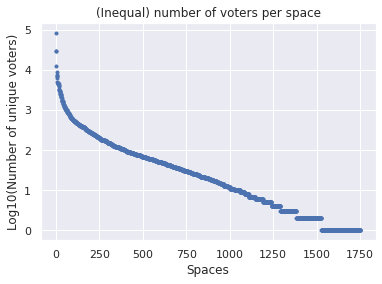

In [81]:
plt.plot(range(len(X)), np.log10(Y), '.')
plt.ylabel('Log10(Number of unique voters)')
plt.xlabel('Spaces')
plt.title("(Inequal) number of voters per space")

In [85]:
len(G.edges)

1191092

In [8]:
proposals = [node for node in G.nodes() if G.nodes[node]['node_type'] == "proposal"]
users = [node for node in G.nodes() if G.nodes[node]['node_type'] == "user"]

In [87]:
len(proposals)

19064

In [88]:
len(users)

315997

In [ ]:
usersG = nx.bipartite.projected_graph(G, users)

In [ ]:
len(usersG.edges())

In [58]:
nx.density(usersG)

0

In [7]:
len(spaces)

3490

In [12]:
for G[users[1]]

AtlasView({'0x93c88a476dc0026ef30ec13a3ec934f6dc6ed8f151c331087c2b18e0031c1634': {'data': {'id': '0x7ed16b0b002899751d9fdf1e4acd1b202e8ef826897a01f0bc3f177ea0bbb7a2', 'voter': '0xD5102725Cc00421854dd616A2D8769CE36017315', 'created': 1637658796, 'choice': {'1': 66.66, '2': 33.33}, 'space': {'id': 'linkstart.eth'}}}, '0xbd94e8c4e5086ad20ee4a45316fb67e2aaca543a6beca2ab65e695701d2cd26e': {'data': {'id': '0x7fcb87e6ba696939562f2e08851b1abefac64cd38c713561633ade794502479d', 'voter': '0xD5102725Cc00421854dd616A2D8769CE36017315', 'created': 1637139515, 'choice': 1, 'space': {'id': 'synapseprotocol.eth'}}}, '0x3d62d5b77b2b9bd3ab1c42c296cc36ccf89f77bea22815081e785d5d28d32366': {'data': {'id': '0x68887c0063cf85e470be2bd62c1c5804d36377c51d9afcaa6a102a968e31b33f', 'voter': '0xD5102725Cc00421854dd616A2D8769CE36017315', 'created': 1636790334, 'choice': 1, 'space': {'id': 'dydxgov.eth'}}}, 'Qmcyn5zdoGQs8nbo1nFroZiG2jWb8UEFPH9Y18cga3ESCJ': {'data': {'id': 'Qmb2mcn3Vu2W4VrRjKHjvRmrJfrgomQz9QPevjbGD5kSYd